![Data Loading](../Data/images/lift-top-banner.png)


# Lyft - Cab Price Prediction

*Author: Ajay Varma*  
*Date: APR-2025*  
*Project Directory: `/Users/ajayvarma/Documents/VS Code/Workspace/Data Science/Projects/Lyft/`*  
*Type: Portfolio Project*

---

## Project Overview

### Objective
The goal of this project is to build a machine learning model that accurately predicts the price of Lyft rides based on features like ride distance, passenger count, time of day, and ride type. This model will help Lyft improve pricing transparency and customer satisfaction.

### Dataset
The dataset contains information from past Lyft rides, including:
- `distance`: Ride distance in miles.
- `passenger_count`: Number of passengers in the ride.
- `time_of_day`: Time when the ride was requested.
- `price`: Ride price (target variable).
- **Categorical Features**: Ride types (`name_Lux Black XL`, `name_Shared`), weather conditions, and source/destination locations (`source_North End`, `destination_Back Bay`).

### Methodology
1. **Data Preprocessing**:
   - Cleaned data by removing duplicates, handling missing values, and encoding categorical variables into numerical form using one-hot encoding.

2. **Outlier Treatment**:
   - Applied the Interquartile Range (IQR) method to remove outliers from the `price` and `distance` columns to improve model accuracy.

3. **Feature Engineering**:
   - Directly used features like `distance`, `passenger_count`, and `time_of_day` for prediction. Categorical features (e.g., ride types, weather) were encoded for use in machine learning models.

4. **Model Development**:
   - Implemented and compared multiple regression models: **Linear Regression** and **Random Forest Regressor**. **Random Forest** outperformed due to its ability to handle non-linear relationships and complex feature interactions.

5. **Model Evaluation**:
   - Models were evaluated using performance metrics such as **MAE**, **MSE**, and **R²** to assess accuracy and predictive power.

6. **Feature Importance**:
   - Conducted feature importance analysis using the **Random Forest** model. Key features influencing price prediction included ride types (e.g., `name_Lux Black XL`), followed by `distance`.

7. **Model Saving**:
   - The best-performing model (Random Forest) was saved using **joblib** for future use.

---

## Model Performance Comparison

### Linear Regression
- **MAE (Mean Absolute Error)**: 1.63
- **MSE (Mean Squared Error)**: 4.52
- **R-squared**: 0.95

### Random Forest
- **MAE (Mean Absolute Error)**: 0.95
- **MSE (Mean Squared Error)**: 2.07
- **R-squared**: 0.98

---

![Data Loading](../Data/images/s1.png)


In [69]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")

![Data Loading](../Data/images/s2a.png)


In [70]:
#reading data
data=pd.read_csv('/Users/ajayvarma/Documents/VS Code/Workspace/Data Science/Projects/Lyft/Data/Cab-price-prediction.csv')

#creating a data copy
df = data.copy()

df.head()
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307408 entries, 0 to 307407
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           307408 non-null  object 
 1   timestamp                    307408 non-null  float64
 2   hour                         307408 non-null  int64  
 3   day                          307408 non-null  int64  
 4   month                        307408 non-null  int64  
 5   datetime                     307408 non-null  object 
 6   timezone                     307408 non-null  object 
 7   source                       307408 non-null  object 
 8   destination                  307408 non-null  object 
 9   cab_type                     307408 non-null  object 
 10  product_id                   307408 non-null  object 
 11  name                         307408 non-null  object 
 12  price                        307408 non-null  float64
 13 

,count,mean,std,min,25%,50%,75%,max
timestamp,307408.0,1.544045e+09,688655.203262,1.543204e+09,1.543444e+09,1.543738e+09,1.544826e+09,1.545161e+09
hour,307408.0,1.162892e+01,6.955654,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,307408.0,1.777348e+01,9.991441,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,307408.0,1.158711e+01,0.492354,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,307408.0,1.735140e+01,10.019171,2.500000e+00,9.000000e+00,1.650000e+01,2.250000e+01,9.750000e+01
distance,307408.0,2.186976e+00,1.086622,3.900000e-01,1.270000e+00,2.140000e+00,2.970000e+00,6.330000e+00
surge_multiplier,307408.0,1.031270e+00,0.135610,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,307408.0,4.233837e+01,0.047636,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,307408.0,-7.106619e+01,0.020281,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,307408.0,3.959638e+01,6.730425,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


![Data Loading](../Data/images/s2.png)


In [71]:
df.isnull().sum()

#removing null value
df.dropna(subset=['price'],inplace = True)

In [72]:
#removing unneccessary columns
df.drop(columns = ['id','latitude', 'longitude', 'product_id', 'timezone'], inplace =True)

#dropping few more columns
df.drop(columns = ['short_summary', 'long_summary'], inplace =True)

<Axes: xlabel='month', ylabel='Count'>

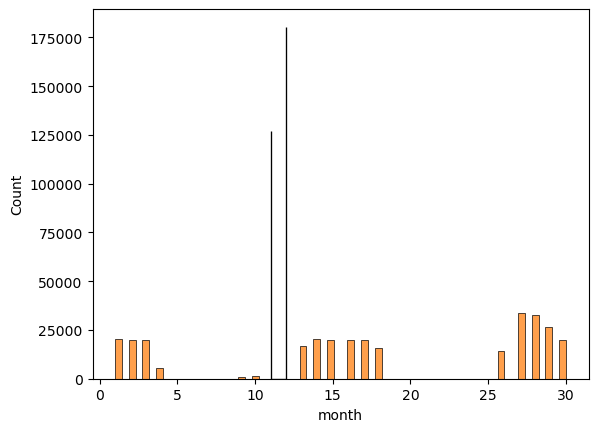

In [73]:
#checking time interval
df['datetime'].min(),df['datetime'].max()

#monthwise data
df['month'].value_counts()

sns.histplot(df['month'])
sns.histplot(df['day'])

 ![Data Loading](../Data/images/s3.png)

In [74]:
#price from each type of cab
df.groupby(['cab_type','name'])['price'].sum()

cab_type  name        
Lyft      Lux              910509.50
          Lux Black       1181605.55
          Lux Black XL    1656124.55
          Lyft             492413.68
          Lyft XL          784375.20
          Shared           308929.50
Name: price, dtype: float64

In [75]:
#source and destinations
df.groupby(['source', 'destination'])['price'].sum()

source    destination            
Back Bay  Boston University          62172.50
          Fenway                     61196.00
          Haymarket Square           79952.50
          North End                  93168.50
          Northeastern University    58695.93
                                       ...   
West End  Fenway                     85551.50
          Haymarket Square           51818.35
          North End                  55043.50
          Northeastern University    83576.00
          South Station              65846.35
Name: price, Length: 72, dtype: float64

In [76]:
#creating enviroment releated columns
enviroment_cols= ['temperature', 'apparentTemperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime', 'price']

df_enviroment_cols = df[enviroment_cols]
df_enviroment_cols.head()

,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,...,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,price
0,42.34,37.12,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,...,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,5.0
1,43.58,37.35,0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,...,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,11.0
2,38.33,32.93,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,...,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,7.0
3,34.38,29.63,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,...,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,26.0
4,37.44,30.88,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,...,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,9.0


![Data Loading](../Data/images/s3a.png)


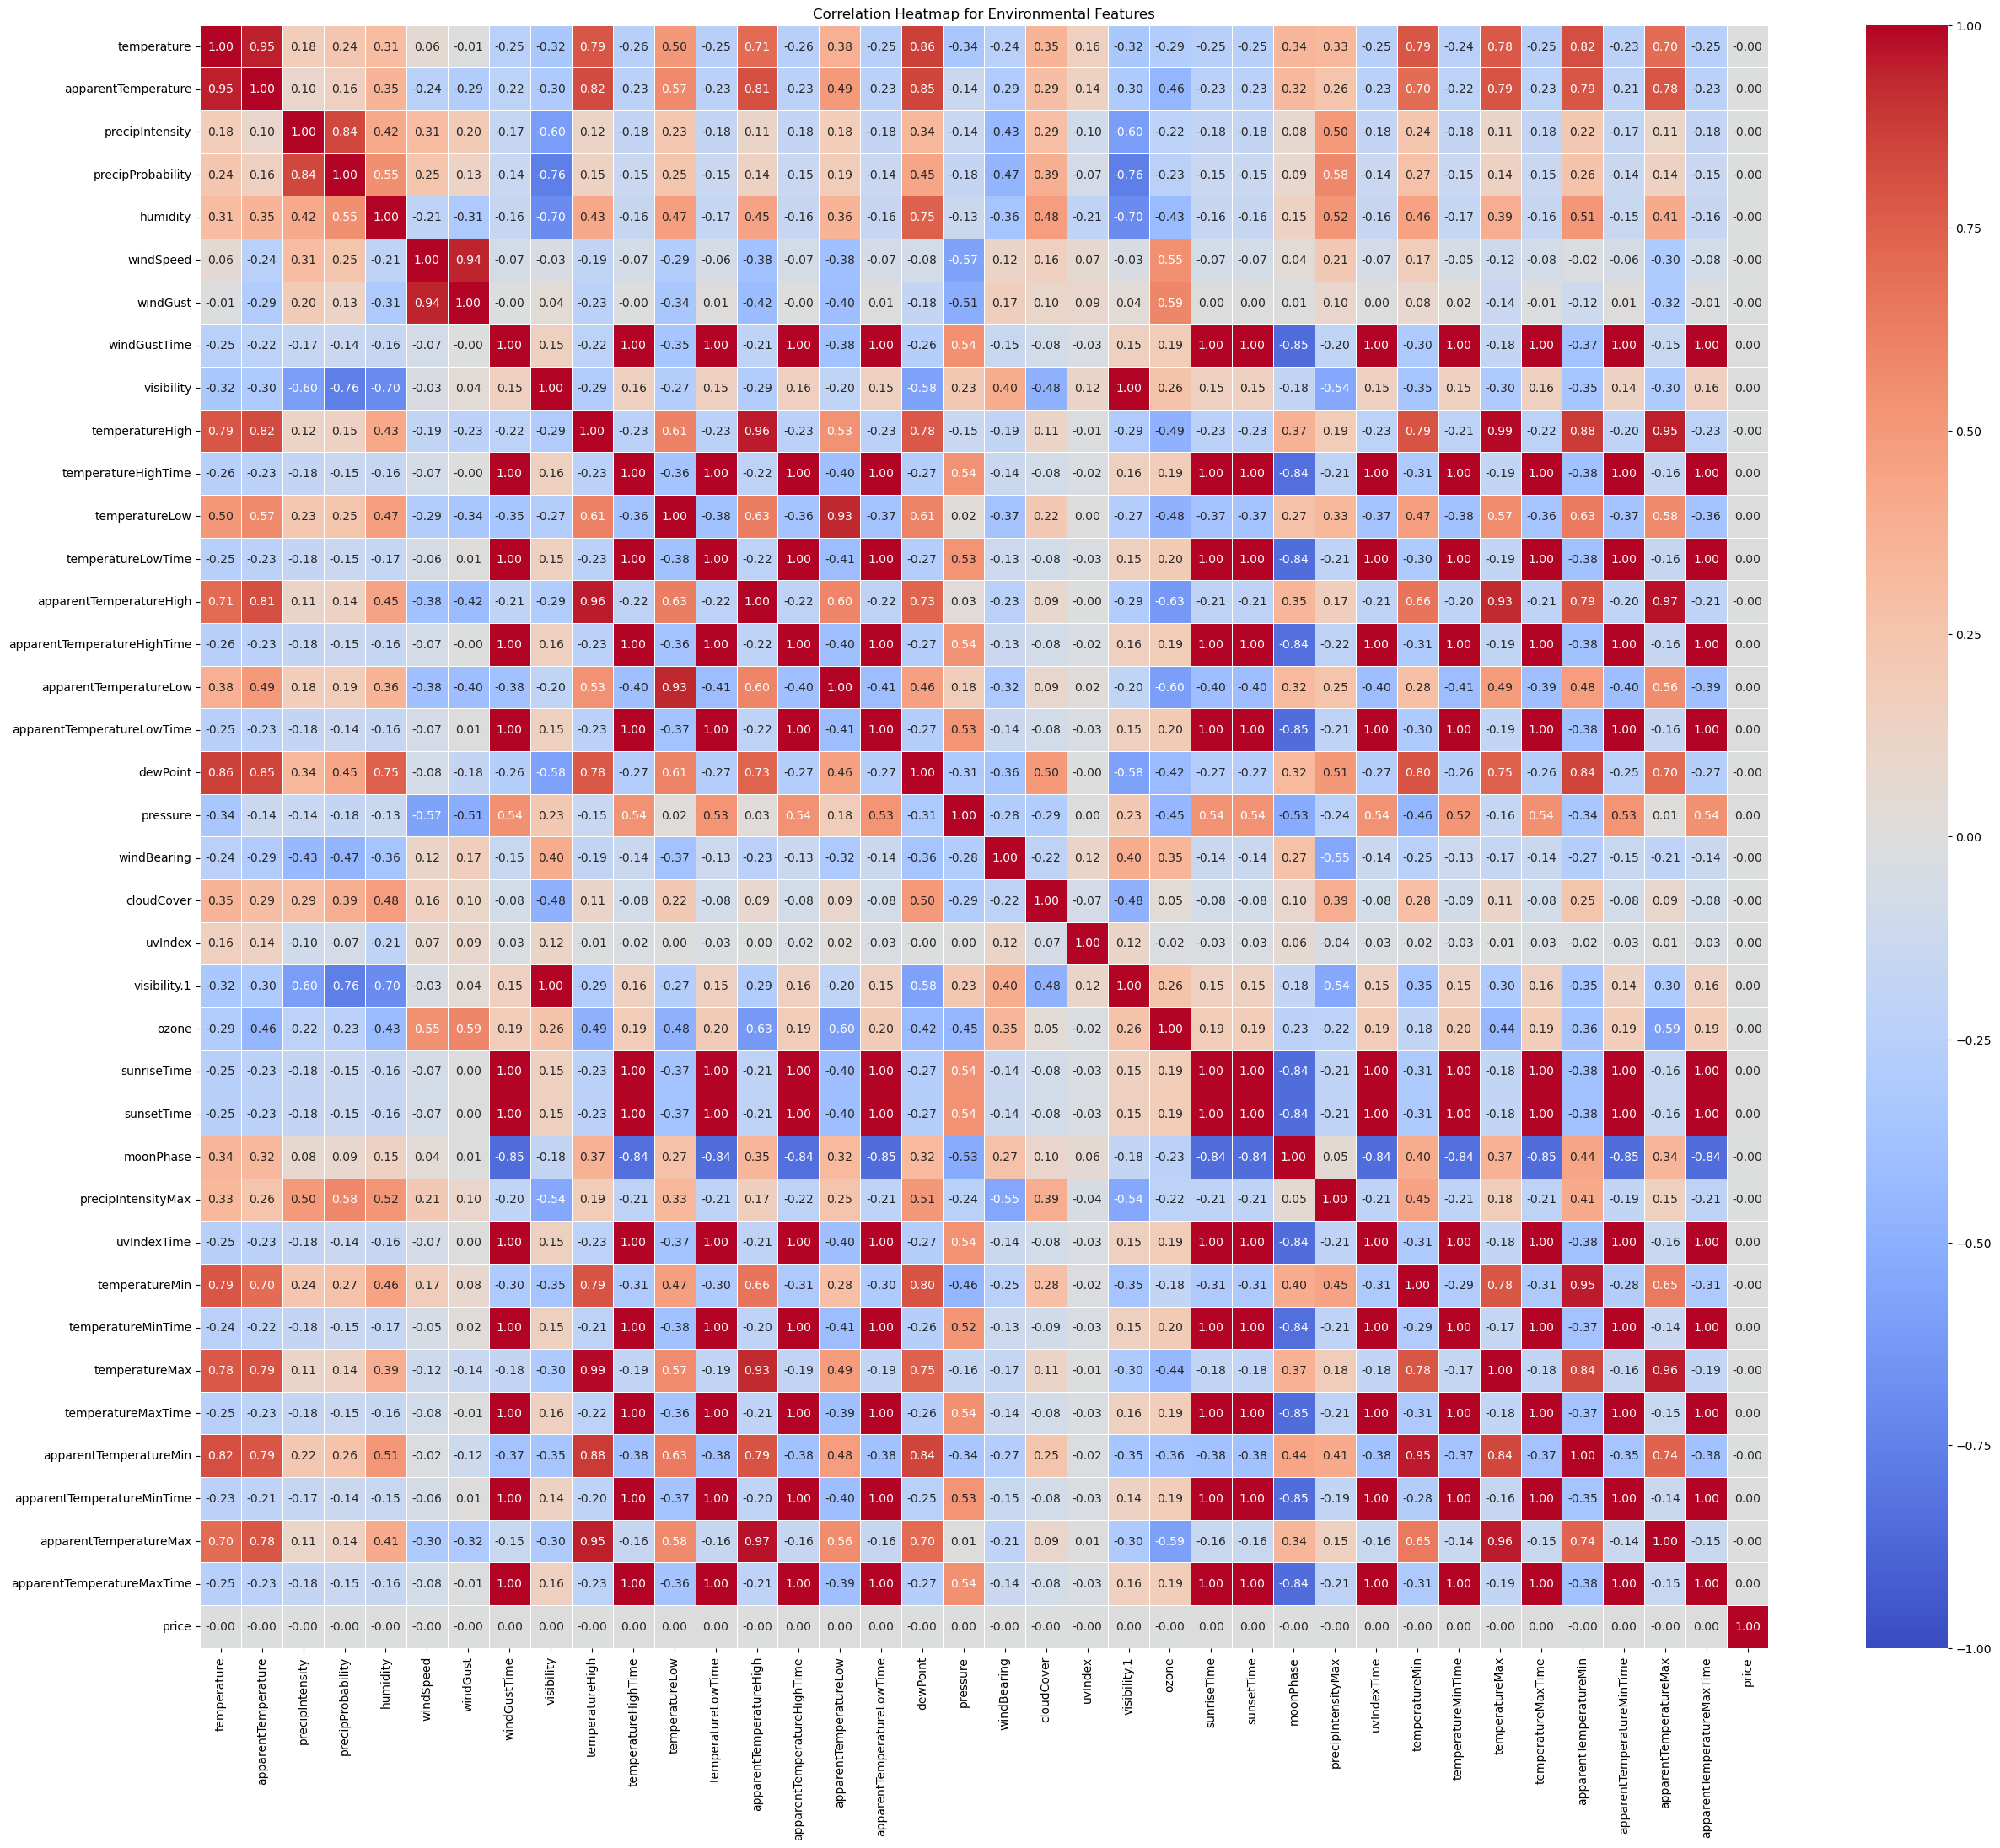

In [77]:
# Calculate the correlation matrix
corr_matrix = df_enviroment_cols.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', vmin=-1, vmax=1)

# Set the title
plt.title('Correlation Heatmap for Environmental Features')

# Display the plot
plt.show()

![Data Loading](../Data/images/s4.png)

In [78]:
#checking corelation of enviroment releated columns with our target variable 'price'
df_enviroment_cols.corr()

df.drop(columns= ['temperature', 'apparentTemperature',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperatureMax', 'apparentTemperatureMaxTime'], inplace =True)

#dropping un-neccessary columns
df.drop(columns = ['timestamp','hour', 'day' ,'month','datetime'], inplace = True)

![Data Loading](../Data/images/s5.png)


In [79]:
#encoding the categorical columns
df_prep= pd.get_dummies(df, columns = ['icon','source' , 'destination','cab_type','name'])

df_prep.head()

#replacing categorical varaiable with numerical
df_prep = df_prep.replace({True:1,False:0})

![Data Loading](../Data/images/s6.png)


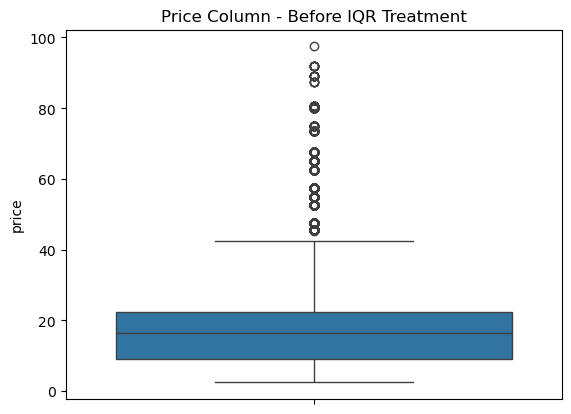

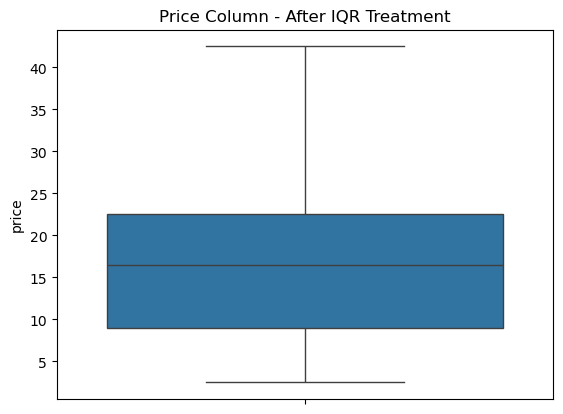

In [80]:
# Checking for outlier in price column
sns.boxplot(data = df_prep, y='price')

# Show the plot
plt.title('Price Column - Before IQR Treatment')
plt.show()

# Calculate IQR for price
q1 = df_prep['price'].quantile(0.25)
q3 = df_prep['price'].quantile(0.75)
iqr = q3 - q1

# Price outlier treatment
df_prep = df_prep[df_prep['price'] < (q3 + 1.5 * iqr)]

# Checking for outlier again in price after removing outliers
sns.boxplot(data = df_prep, y='price')
plt.title('Price Column - After IQR Treatment')
plt.show()

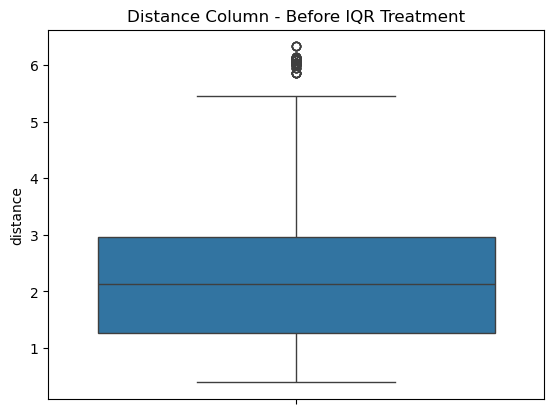

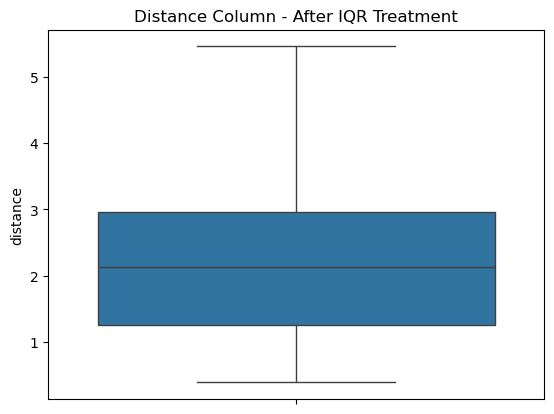

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Checking for outlier in distance column
sns.boxplot(data = df_prep, y='distance')

# Show the plot
plt.title('Distance Column - Before IQR Treatment')
plt.show()

# Calculate IQR for distance
q1 = df_prep['distance'].quantile(0.25)
q3 = df_prep['distance'].quantile(0.75)
iqr = q3 - q1

# Distance outlier treatment
df_prep = df_prep[df_prep['distance'] < (q3 + 1.5 * iqr)]

# Checking for outlier again in distance after removing outliers
sns.boxplot(data = df_prep, y='distance')
plt.title('Distance Column - After IQR Treatment')
plt.show()


Price Column Skewness: 0.58
Price Column Kurtosis: -0.48


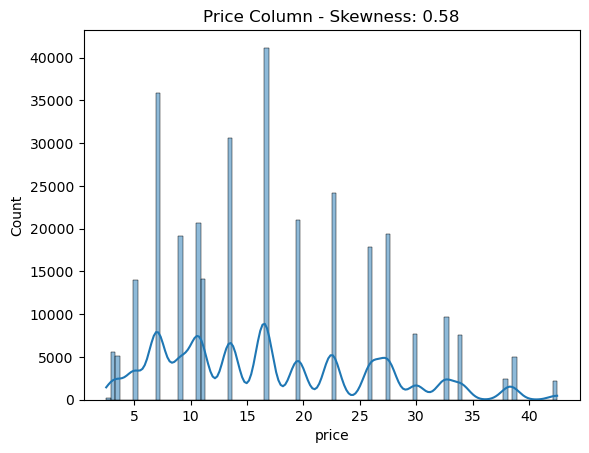

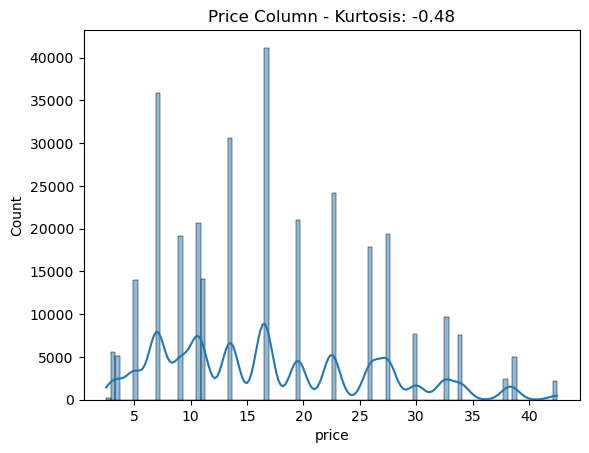

In [82]:
from scipy.stats import skew, kurtosis

# Checking skewness and kurtosis for price column
price_skew = skew(df_prep['price'])
price_kurt = kurtosis(df_prep['price'])

# Print skewness and kurtosis
print(f"Price Column Skewness: {price_skew:.2f}")
print(f"Price Column Kurtosis: {price_kurt:.2f}")

# Plotting the skewness and kurtosis

# Skewness plot
sns.histplot(df_prep['price'], kde=True)
plt.title(f'Price Column - Skewness: {price_skew:.2f}')
plt.show()

# Kurtosis plot
sns.histplot(df_prep['price'], kde=True)
plt.title(f'Price Column - Kurtosis: {price_kurt:.2f}')
plt.show()

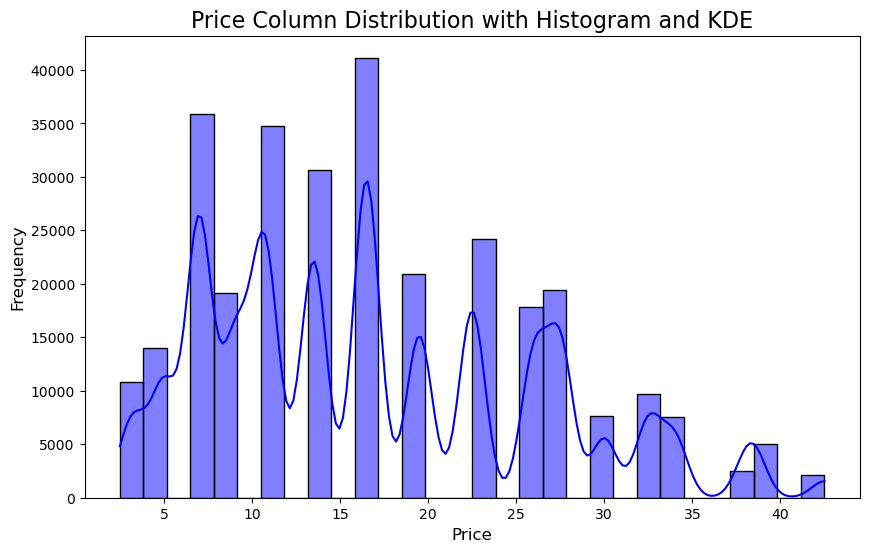

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histogram for price column
plt.figure(figsize=(10, 6))
sns.histplot(df_prep['price'], kde=True, color='blue', bins=30)
plt.title('Price Column Distribution with Histogram and KDE', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


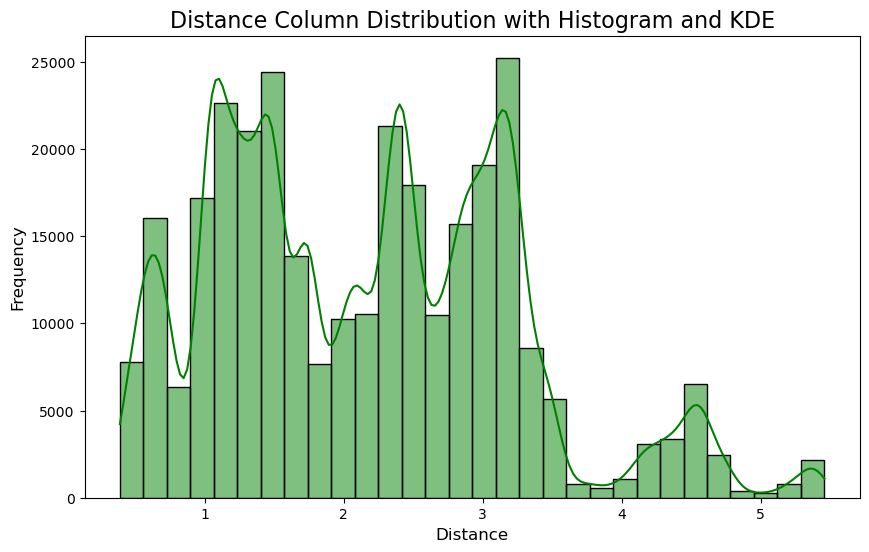

In [84]:
# Plotting histogram for distance column
plt.figure(figsize=(10, 6))
sns.histplot(df_prep['distance'], kde=True, color='green', bins=30)
plt.title('Distance Column Distribution with Histogram and KDE', fontsize=16)
plt.xlabel('Distance', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [85]:
# Checking skewness and kurtosis for distance column
distance_skew = skew(df_prep['distance'])
distance_kurt = kurtosis(df_prep['distance'])

# Print skewness and kurtosis for distance column
print(f"Distance Column Skewness: {distance_skew:.2f}")
print(f"Distance Column Kurtosis: {distance_kurt:.2f}")

Distance Column Skewness: 0.52
Distance Column Kurtosis: -0.17


In [86]:
from scipy.stats import skew, kurtosis

# Checking skewness and kurtosis for price column
price_skew = skew(df_prep['price'])
price_kurt = kurtosis(df_prep['price'])

# Print skewness and kurtosis for price column
print(f"Price Column Skewness: {price_skew:.2f}")
print(f"Price Column Kurtosis: {price_kurt:.2f}")

Price Column Skewness: 0.58
Price Column Kurtosis: -0.48


![Data Loading](../Data/images/s5a.png)


In [87]:
#defining independent and dependent feature
x = df_prep.drop(columns = ['price'])
y = df_prep['price']

ss = StandardScaler()

#standardizing the data
x = ss.fit_transform(x)

#splitting in train and test
x_train, x_test, y_train,y_test=train_test_split(x,y, train_size=0.2)

![Data Loading](../Data/images/s8.png)


In [88]:
# Model preparation
linear = LinearRegression()

# Model fitting
linear.fit(x_train, y_train)

# Predictions for both training and testing data
y_pred_train = linear.predict(x_train)
y_pred_test = linear.predict(x_test)

# Calculate performance metrics for training data
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate performance metrics for testing data
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the results for both training and testing data
print(f"Training MAE: {mae_train:.2f}, Testing MAE: {mae_test:.2f}")
print(f"Training MSE: {mse_train:.2f}, Testing MSE: {mse_test:.2f}")
print(f"Training R²: {r2_train:.2f}, Testing R²: {r2_test:.2f}")

Training MAE: 1.62, Testing MAE: 1.63
Training MSE: 4.48, Testing MSE: 4.53
Training R²: 0.95, Testing R²: 0.95


![Data Loading](../Data/images/s9.png)


In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Fit the Random Forest model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

# Make predictions for both training and testing data
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Calculate performance metrics for training data
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate performance metrics for testing data
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the results for both training and testing data
print(f"Training MAE: {mae_train:.2f}, Testing MAE: {mae_test:.2f}")
print(f"Training MSE: {mse_train:.2f}, Testing MSE: {mse_test:.2f}")
print(f"Training R²: {r2_train:.2f}, Testing R²: {r2_test:.2f}")


Training MAE: 0.55, Testing MAE: 0.95
Training MSE: 0.76, Testing MSE: 2.08
Training R²: 0.99, Testing R²: 0.98


In [90]:
import joblib

# Save the model
folder_path = '/Users/ajayvarma/Documents/VS Code/Workspace/Data Science/Projects/Lyft/Models/'

# Save the Random Forest model
joblib.dump(rf, f'{folder_path}random_forest_model.joblib')

print("Model saved successfully!")



Model saved successfully!


![Data Loading](../Data/images/s10.png)


## Insights & Recommendations

### Insights
1. **Random Forest** outperforms **Linear Regression** on all metrics:
   - **Lower MAE** (0.95 vs. 1.63): This indicates **Random Forest** makes predictions closer to actual values.
   - **Lower MSE** (2.07 vs. 4.52): Smaller squared errors on average for **Random Forest**.
   - **Higher R²** (0.98 vs. 0.95): **Random Forest** explains 98% of the variance in the data, indicating better predictive accuracy.

2. **Feature Importance**:  
   - The most important features for price prediction were **ride type** (e.g., `name_Lux Black XL`) and **distance**. These significantly impact the predicted price.
   - Weather and source/destination features were relatively less important.

### Recommendations
1. **Model Deployment**:
   - **Random Forest** is recommended for deployment due to its superior performance. It can be used for real-time price prediction in production systems.

2. **Model Tuning**:
   - Consider **hyperparameter tuning** (e.g., adjusting the number of trees, tree depth) to further optimize **Random Forest**. Use **Grid Search** or **Random Search** to find the best model configuration.
   - Implement **cross-validation** to ensure that the model generalizes well to different subsets of the data.

3. **Exploring Advanced Models**:
   - You may want to experiment with more sophisticated models such as **Gradient Boosting Machines (GBM)**, **XGBoost**, or **LightGBM** to potentially improve performance further.

4. **Feature Engineering**:
   - Enhance model performance by experimenting with new or transformed features. **Feature selection** to remove irrelevant features could also improve model accuracy.

5. **Outlier Handling**:
   - While outlier treatment via the IQR method has been implemented, **domain knowledge** could help decide if certain outliers should be kept, especially if they carry valuable information.

6. **Future Work**:
   - **Monitoring and Maintenance**: Once deployed, monitor the model's performance over time and retrain it as more data becomes available.
   - **Scalability**: Test the model’s scalability to ensure it can handle larger datasets in the future.

---

## Conclusion
- **Random Forest** is the recommended model for predicting Lyft ride prices due to its better performance on **MAE**, **MSE**, and **R²** metrics.
- **Linear Regression** is still useful for simpler, less computationally demanding applications but is outperformed by **Random Forest** in this scenario.
- Further **hyperparameter tuning**, **model experimentation**, and **continuous monitoring** are recommended for ongoing improvements and performance optimization.

![Data Loading](../Data/images/lift-bottom.png)
